<a href="https://colab.research.google.com/github/Jang-jw/DeepLearning/blob/main/ex02_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0(%ED%8F%90%EC%95%94%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 드라이브 마운트
form google.colab import drive
drive.mount('/content/drive')

SyntaxError: ignored

# 목표
- 폐암환자의 생존을 예측하는 분류
- 다층 퍼셉트론을 이용해서 이진분류 문제를 해결해보자.

In [3]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 데이터 불러오기
- header : 데이터를 불러오면서 컬럼명을 설정해주는 키워드

(None : 인덱스 번호로 컬럼명이 출력)

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/ThoraricSurgery.csv',
                 header=None)

In [5]:
data
# 현재 데이터는 컬럼명이 별도로 없었다. 그래서 그냥 읽어오면 첫번째 행이 컬럼으로 들어간다.
# 총 컬럼의 갯수 : 18개
# 0 ~ 16 컬럼 : 속성 / 특징 (종양 유형, 폐활량, 고통의 정도, 기침 ...)
# 17 번 컬럼 : 정답 / 레이블 / 클래스 (수술 후 생존 결과) : 사망 0 / 생존 1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [6]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


In [7]:
data.shape

(470, 18)

In [8]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [9]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,-0.007878,-0.034985,0.029563,-0.021449,0.052724,0.027238,-0.061885,0.008845,0.027271,0.047079,-0.009229,-0.016382,-0.015761,-0.038681,-0.042400,-0.005826,-0.074924
1,-0.007878,1.000000,0.121263,0.058780,-0.055900,0.047900,-0.062958,-0.047142,-0.075850,-0.019562,-0.135050,0.029753,-0.008675,-0.017461,-0.107427,-0.008675,0.076271,0.060444
2,-0.034985,0.121263,1.000000,0.032975,-0.091094,0.019786,-0.095827,0.055829,-0.052770,-0.100242,0.034088,-0.115145,-0.009135,-0.035584,-0.012009,-0.060578,-0.290178,-0.046374
3,0.029563,0.058780,0.032975,1.000000,-0.143155,0.161615,0.102979,0.260073,-0.099914,-0.086103,0.015504,-0.022251,-0.013617,-0.025088,-0.100853,-0.016509,-0.115900,-0.042841
4,-0.021449,-0.055900,-0.091094,-0.143155,1.000000,0.092863,0.123296,0.092863,0.684647,0.418042,0.089751,0.025310,0.026788,0.023166,0.172289,-0.034330,0.214528,0.093200
5,0.052724,0.047900,0.019786,0.161615,0.092863,1.000000,0.256225,0.067529,-0.024115,-0.072455,0.099942,0.022578,-0.017372,-0.034968,-0.077406,-0.017372,0.044789,0.057375
6,0.027238,-0.062958,-0.095827,0.102979,0.123296,0.256225,1.000000,0.134386,0.081772,0.060393,0.059840,-0.001471,-0.026886,0.086156,-0.044942,-0.026886,0.086705,0.065785
7,-0.061885,-0.047142,0.055829,0.260073,0.092863,0.067529,0.134386,1.000000,0.049843,-0.072455,0.075502,-0.042725,-0.017372,0.097572,-0.077406,-0.017372,-0.015331,0.105530
8,0.008845,-0.075850,-0.052770,-0.099914,0.684647,-0.024115,0.081772,0.049843,1.000000,0.202245,0.145345,0.016551,0.044101,0.017815,0.200373,-0.026401,0.149589,0.088860
9,0.027271,-0.019562,-0.100242,-0.086103,0.418042,-0.072455,0.060393,-0.072455,0.202245,1.000000,-0.036044,0.069522,0.058695,0.029726,0.118527,-0.029161,0.208003,0.086467


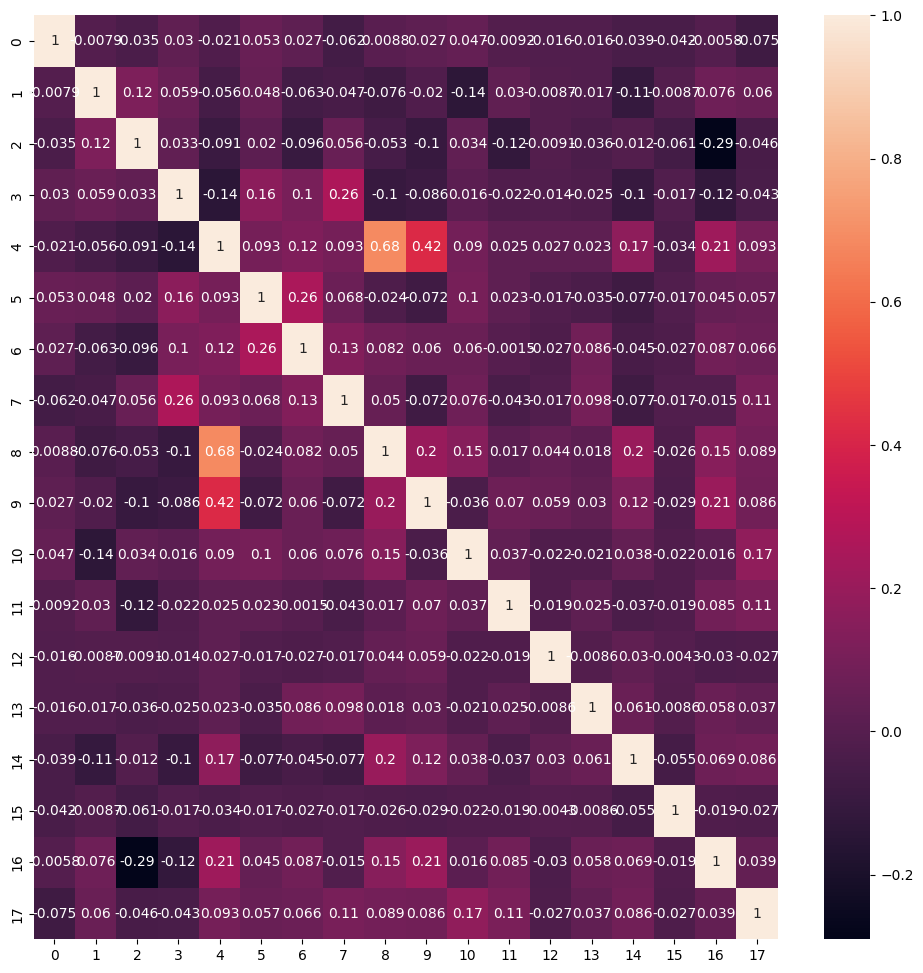

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

### 데이터 분할
- 1. 문제와 정답 데이터로 분리
- 2. 훈련과 평가셋으로 데이터 분리

In [13]:
# 문제와 정답 분리
X=data.iloc[:,:-1] # 17 인 컬럼을 제외한 나머지 컬럼 설정
y=data.iloc[:,-1]

In [14]:
# 훈련과 평가셋으로 데이터 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((329, 17), (141, 17), (329,), (141,))

### Keras 를 활용해서 딥러닝 신경망을 구축
- 1. 신경망 구조를 설계
- 2. 학습 / 평가 방법 설정
- 3. 학습 + 시각화
- 4. 모델 평가

In [16]:
# import
from tensorflow.keras import Sequential # 뼈대가 되는 부분
from tensorflow.keras.layers import Dense # 층을 쌓아주는 부분

In [18]:
# 1. 신경망 구조 설계
# 뼈대 설정
model=Sequential()

# 입력층 설정
# 뉴런의 갯수는 10개, 데이터 특성의 갯수는 17개, 활성화 : 시그모이드
# units=
# input_dim=
model.add(Dense(units=10,input_dim=17,activation='sigmoid'))

# 중간층 설정
# 중간층 1 : 뉴런의 갯수는 6, 활성화 함수는 시그모이드
model.add(Dense(units=6,activation='sigmoid'))

# 중간층 2 : 뉴런의 갯수는 4, 활성화 함수는 시그모이드
model.add(Dense(units=4,activation='sigmoid'))

# 출력층 설정
# 출력층에서 활성화 함수 : 회귀 (활성화 함수 X), 이진분류(시그모이드), 다중분류에 따라 달라질 수 있다.
# 출력층 : 뉴런의 갯수는 1, 활성화 함수는 시그모이드
model.add(Dense(units=1,activation='sigmoid'))

# 모델 요약 정보
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                180       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 279 (1.09 KB)
Trainable params: 279 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### activation (활성화 함수) : 자극에 대한 반응 여부를 결정
- 회귀 : 별도의 활성화 함수가 없다.
  - 딥러닝의 노드 (뉴런) 는 선형 회귀 기반, 결과값 => 실수값 (실수) => 별도의 활성화 함수를 거쳐줄 필요가 없다.

- 분류 : 딥러닝은 선형 회귀 모델 기반이라 도출된 실제 수치값으로 분류 문제를 예측하기 힘들다.
- 별도로 분류에 맞는 활성화를 연결 해줘야 한다.
- 확률 정보를 가지고 판단하는게 정확하다.
- 이번 이진 분류 실습에서는 sigmoid 함수를 이용해서 0 과 1 로 분류
(0.5 를 기준값으로 두고 기준값보다 높은지 낮은지에 대한 확률 정보를 가지고 최종 출력값을 결정한다)

In [19]:
# 2. 학습 / 평가 방법 설정
model.compile(loss='binary_crossentropy', # 손실 함수 => 가장 낮은값을 찾아야 하는 부분
              optimizer='SGD', # 최적화 함수 => 모델이 가장 잘 작동하는 상황을 만드는 함수
              metrics=['accuracy']) # 평가지표

In [20]:
# 3. 모델 학습
# 학습 반복은 100 => epochs 를 통해서 반복횟수를 정해준다.
h=model.fit(X_train,y_train,epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 4ms/step - loss: 0.5029 - accuracy: 0.8541
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4942 - accuracy: 0.8541
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4868 - accuracy: 0.8541
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.4794 - accuracy: 0.8541
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4732 - accuracy: 0.8541
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.8541
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.8541
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4584 - accuracy: 0.8541
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.8541
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4506 - accuracy: 0.8541
Epoch 11/

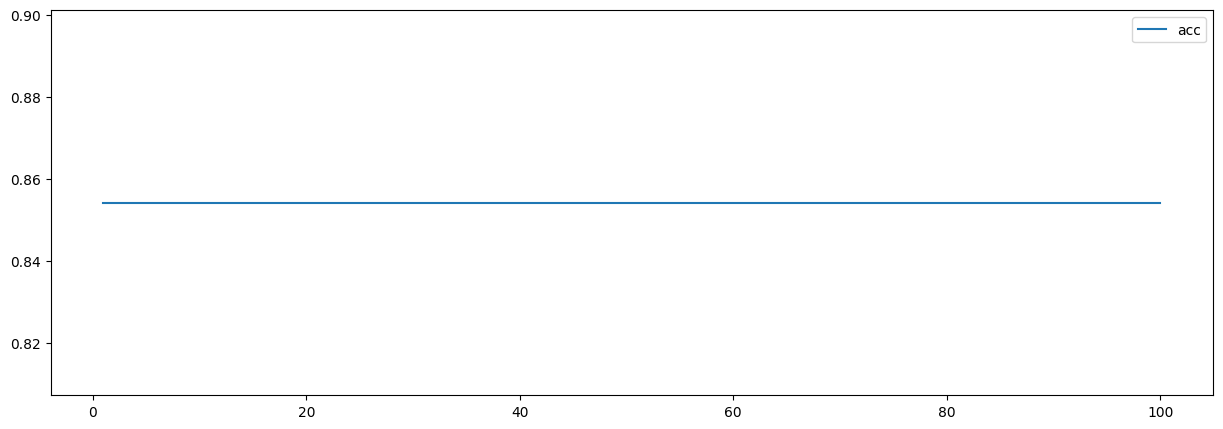

In [23]:
# 시각화
# 학습이 반복될 때마다 정확도가 어떻게 변하는가 그래프로 그려보자
plt.figure(figsize=(15,5))
plt.plot(range(1,101),
         h.history['accuracy'],
         label='acc')
plt.legend()
plt.show()

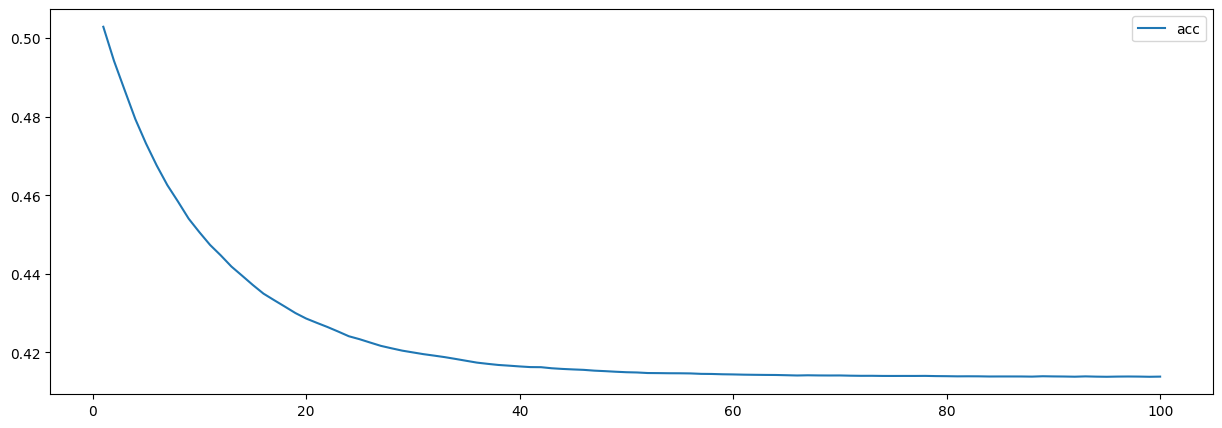

In [24]:
# 시각화
# 학습이 반복될 때마다 정확도가 어떻게 변하는가 그래프로 그려보자
plt.figure(figsize=(15,5))
plt.plot(range(1,101),
         h.history['loss'],
         label='acc')
plt.legend()
plt.show()

In [21]:
# 4. 모델 평가
# evaluate (테스트 문제, 테스트 답)
model.evaluate(X_test,y_test)

5/5 [==============================] - 1s 8ms/step - loss: 0.4346 - accuracy: 0.8440


[0.43455344438552856, 0.8439716100692749]

In [25]:
# 5. 모델 예측
# predict()
pre=model.predict(X_test)
print(pre)

5/5 [==============================] - 0s 3ms/step
[[0.15289031]
 [0.14366205]
 [0.14873534]
 [0.14379293]
 [0.147884  ]
 [0.14366676]
 [0.144599  ]
 [0.14352655]
 [0.14380157]
 [0.15597184]
 [0.15008114]
 [0.14366558]
 [0.14390382]
 [0.15598086]
 [0.15754078]
 [0.14366558]
 [0.15529357]
 [0.15880205]
 [0.15584607]
 [0.15576337]
 [0.14548331]
 [0.14367229]
 [0.1436656 ]
 [0.14438392]
 [0.1483208 ]
 [0.14366603]
 [0.14366558]
 [0.15426546]
 [0.14366607]
 [0.15471333]
 [0.14696199]
 [0.14366558]
 [0.1597234 ]
 [0.1611266 ]
 [0.14366558]
 [0.15563966]
 [0.14367089]
 [0.1560285 ]
 [0.14367217]
 [0.14424078]
 [0.14368184]
 [0.15636806]
 [0.14366558]
 [0.15597771]
 [0.14366558]
 [0.15602896]
 [0.14883529]
 [0.14367983]
 [0.15641984]
 [0.14366558]
 [0.14368908]
 [0.1439045 ]
 [0.14366603]
 [0.14366573]
 [0.16077214]
 [0.14911306]
 [0.14953808]
 [0.14851308]
 [0.14375086]
 [0.14366564]
 [0.14366558]
 [0.15600264]
 [0.14827542]
 [0.14366558]
 [0.16021992]
 [0.14379914]
 [0.14991575]
 [0.1599135

In [26]:
np.argmax(pre[0])

0

In [27]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([119,  22]))

In [28]:
pre=pre>0.5
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,pre)
display(cm)
cm=pd.DataFrame(cm,index=['실제 0','실제 1'],columns=['예측 0','예측 1'])
cm

array([[119,   0],
       [ 22,   0]])

,예측 0,예측 1
실제 0,119,0
실제 1,22,0


- 실제 사망인 것을 사망이라고 예측한 값 : 119
- 실제 사망이 아닌 것을 사망이라고 예측 : 22